In [2]:
import pandas as pd
import numpy as np


train_data=pd.read_csv('C:/Users/Lenovo/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('C:/Users/Lenovo/Downloads/house-prices-advanced-regression-techniques/test.csv')


In [3]:

train_data.head(5)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
## Count of top 20 Fields of train data having null values
train_data.isnull().sum().sort_values(ascending=False).iloc[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [6]:
## Count of top 35 Fields of test data having null values
test_data.isnull().sum().sort_values(ascending=False).iloc[:35]


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
MiscVal            0
BedroomAbvGr       0
dtype: int64

In [7]:
def filter(dataset):
    n=len(dataset)
    ll=[]
    for col in dataset.columns:
        if( dataset[col].isnull().sum()>=int(n*0.2) ): #taking 0.2 as ratio any attribute having more null values than 20% of total data is discarded
            ll.append(col)
    print(ll,"features removed from provided data")
    dataset.drop(ll,axis=1,inplace=True)
    return dataset

In [8]:
train_data = filter(train_data)
test_data = filter(test_data)

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] features removed from provided data
['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] features removed from provided data


In [9]:
def filter1(dataset):
    for col in dataset.columns:
        #print(dataset[col].dtypes)
        if dataset[col].dtypes=='object':
            dataset[col].fillna(dataset[col].mode()[0],inplace=True)
        elif dataset[col].dtypes=='int64' or dataset[col].dtypes=='float64':
            dataset[col].fillna(dataset[col].mean(),inplace=True)

    return dataset


In [10]:
train_data=filter1(train_data)
test_data=filter1(test_data)


## Top 5 Fields of test data having null values
test_data.isnull().sum().sort_values(ascending=False).iloc[:5]


Id              0
GarageType      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
dtype: int64

In [11]:

## Top 5 Fields of test data having null values
train_data.isnull().sum().sort_values(ascending=False).iloc[:5]

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
dtype: int64

In [12]:
total= pd.concat([train_data.drop(['SalePrice'],axis=1),test_data]
,axis=0)

In [13]:
def categorical_columns(dataset):
    l=[]
    for col in dataset.columns:

        if dataset[col].dtypes=='object':
            l.append(col)
        else :
            pass

    return l

In [14]:
categorical_col=categorical_columns(total)
categorical_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [15]:
total=pd.get_dummies(total, prefix=categorical_col,drop_first=True,dtype=int)
save_cols=total.columns

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total.iloc[:1460],train_data['SalePrice'].values, test_size=0.2, random_state=42)
validation_data =total.iloc[1460:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 230)
(292, 230)
(1168,)
(292,)


In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[-1.11928402 -0.8667643  -0.01288179 ... -0.12510865  0.46001984
  -0.30263639]
 [ 0.79046412  0.07410996 -0.5027726  ... -0.12510865  0.46001984
  -0.30263639]
 [-0.21615189 -0.63154574 -0.14648837 ... -0.12510865  0.46001984
  -0.30263639]
 ...
 [ 1.32669882 -0.8667643  -0.45823707 ... -0.12510865  0.46001984
  -0.30263639]
 [ 0.30597137 -0.16110861 -0.68091471 ... -0.12510865  0.46001984
  -0.30263639]
 [ 0.93157852  1.48542135 -0.76998577 ... -0.12510865  0.46001984
  -0.30263639]]
[[ 0.38123238 -0.8667643  -0.01288179 ... -0.12510865  0.46001984
  -0.30263639]
 [ 0.88218848  0.07410996  1.23411301 ... -0.12510865  0.46001984
  -0.30263639]
 [-0.74533088 -0.63154574 -0.63637918 ... -0.12510865  0.46001984
  -0.30263639]
 ...
 [ 0.16956079  0.07410996 -0.32463048 ... -0.12510865  0.46001984
  -0.30263639]
 [-0.18557711  0.30932853 -0.45823707 ... -0.12510865  0.46001984
  -0.30263639]
 [-0.01859174 -0.8667643  -0.01288179 ... -0.12510865  0.46001984
  -0.30263639]]


In [20]:
x_train=pd.DataFrame(X_train,columns=save_cols)
Y_train=pd.DataFrame(y_train,columns=['SalePrice'])
train=pd.concat([x_train, Y_train],axis=1)

In [21]:
save_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=230)

<Axes: >

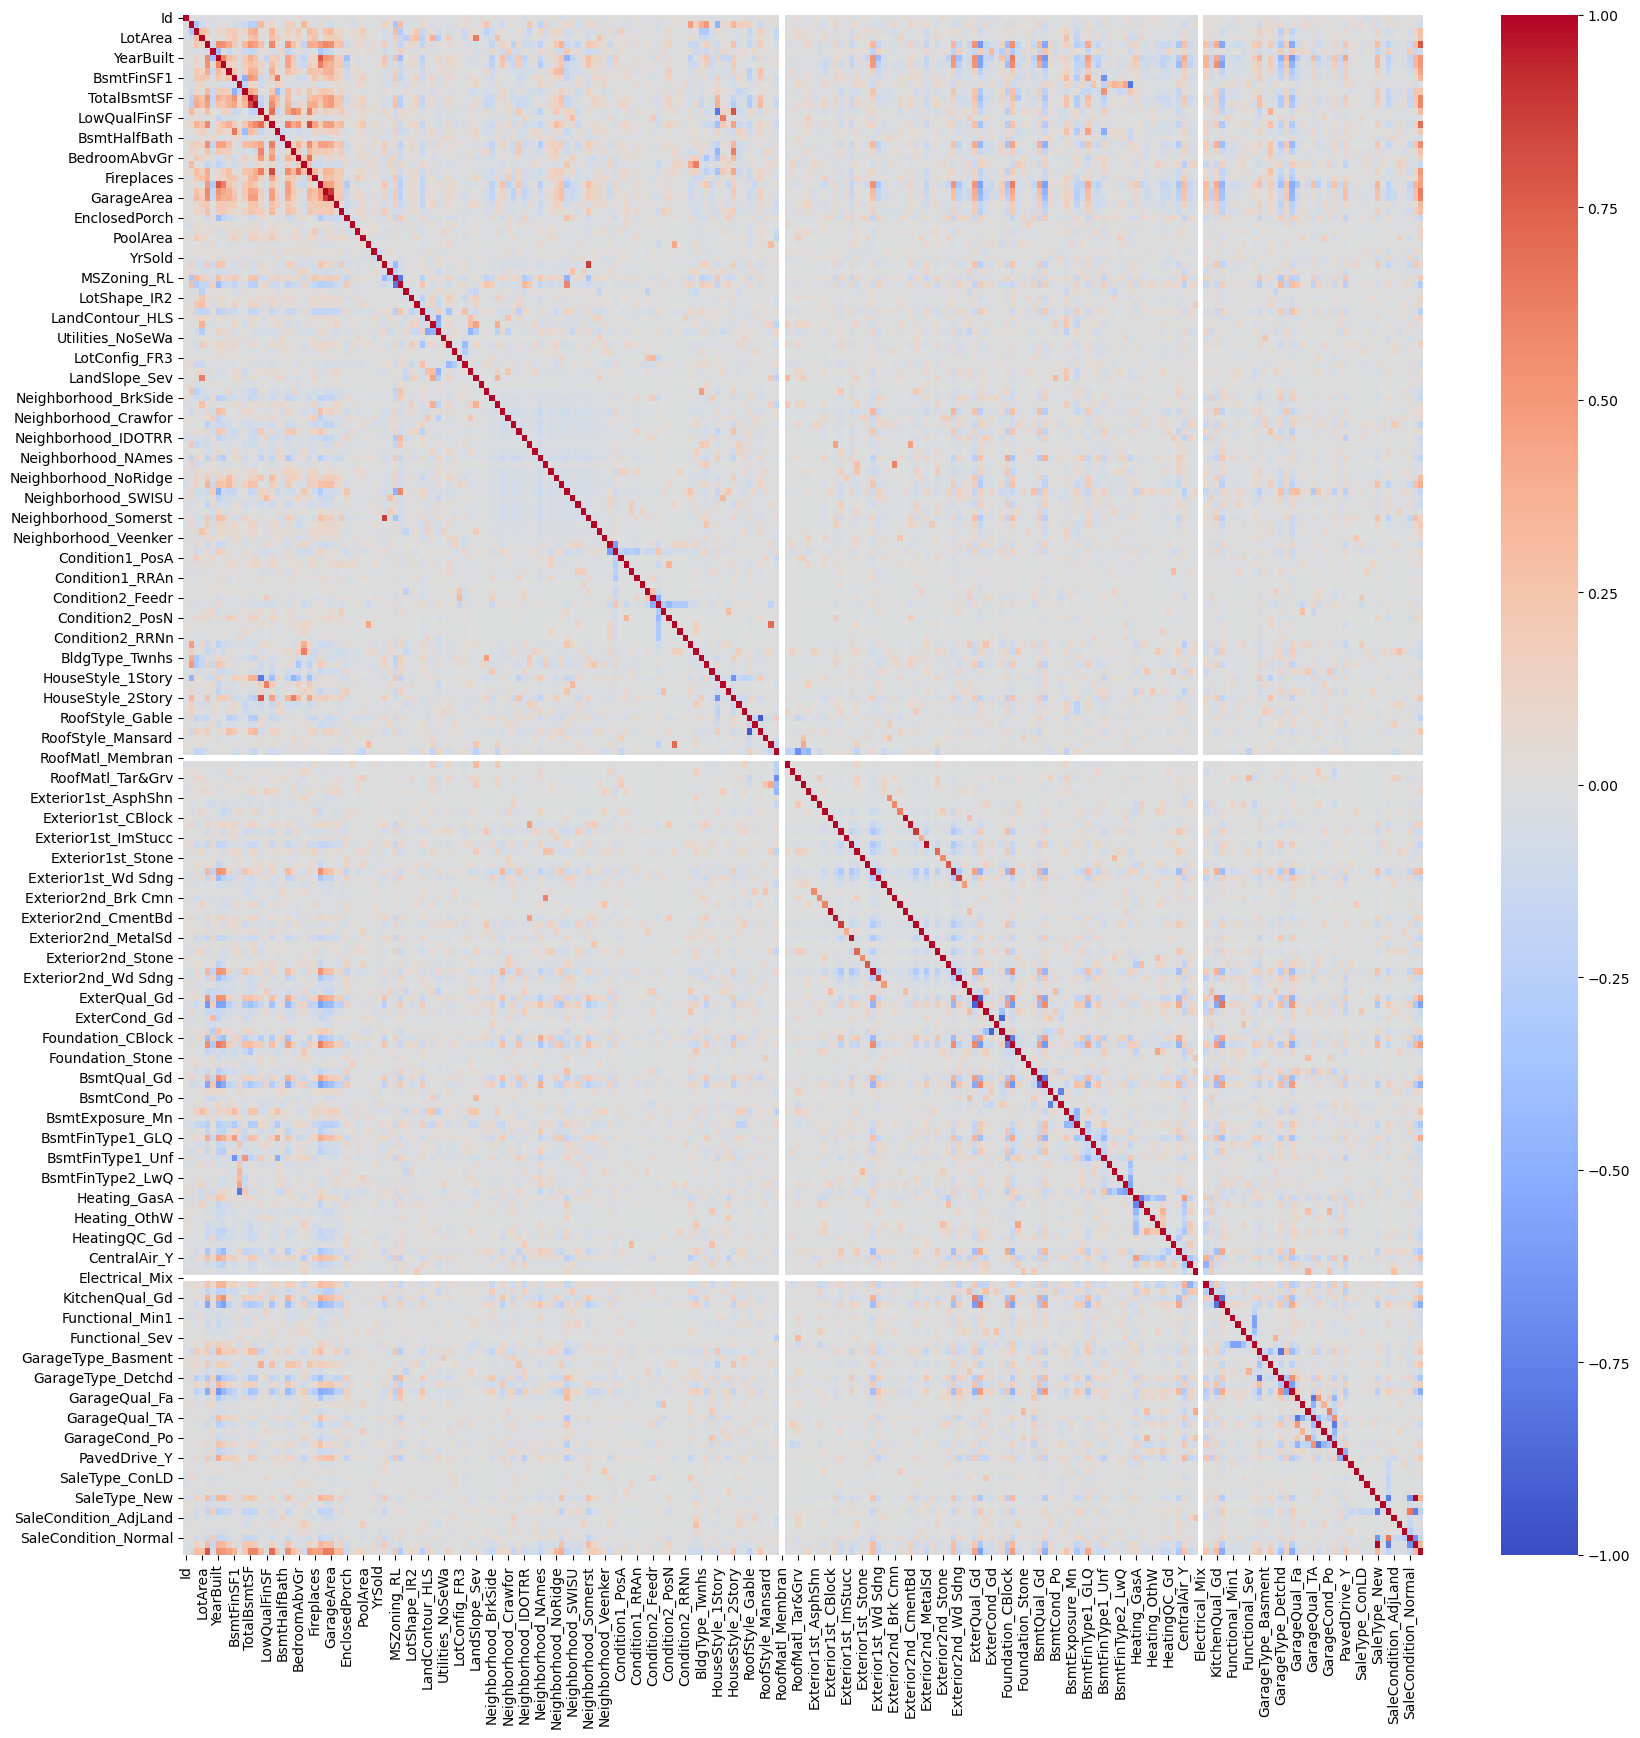

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

corr = train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,vmin=-1,vmax=1,cmap='coolwarm')

In [23]:
train.corr().reset_index()[['index','SalePrice']]

,index,SalePrice
0,Id,-0.019643
1,MSSubClass,-0.088081
2,LotFrontage,0.312155
3,LotArea,0.266204
4,OverallQual,0.785555
...,...,...
226,SaleCondition_Alloca,0.023632
227,SaleCondition_Family,-0.048953
228,SaleCondition_Normal,-0.162234
229,SaleCondition_Partial,0.342705


Gradient Boost Regressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
regressor = GradientBoostingRegressor(
    max_depth=10,
    n_estimators=500,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)
errors = [mean_squared_error(y_train, y_pred) for y_pred in regressor.staged_predict(X_train)]
best_n_estimators = np.argmin(errors)
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)
y_pred1 = best_regressor.predict(X_test)

In [36]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test, y_pred1)

0.8695887264678418

In [40]:
from sklearn.ensemble import RandomForestRegressor 
 
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0) 
 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
y_pred2 = regressor.predict(X_test)
r2_score(y_test, y_pred2)

0.890534359970638

In [44]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 1000)

xg_reg.fit(X_train,y_train)

y_pred3 = xg_reg.predict(X_test)
r2_score(y_test, y_pred3)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:49:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9061721528020583

In [46]:
pred_val_1=pd.DataFrame(best_regressor.predict(validation_data),columns=['Gradient_Boost'])
pred_val_2=pd.DataFrame(regressor.predict(validation_data),columns=['Random_Forest'])
pred_val_3=pd.DataFrame(xg_reg.predict(validation_data),columns=['XG_Boost'])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [48]:
sub_df=pd.read_csv('C:/Users/Lenovo/Downloads/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df,pred_val_1,pred_val_2,pred_val_3],axis=1)
datasets.columns=['Id','SalePrice','Gradient_Boost','Random_Forest','XG_Boost']

datasets.isnull()
datasets.to_csv('final_submission.csv',index=False)